In [1]:
# Preamble (load all the things that are nice)
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.image as image

In [2]:
# Load shark data (Vemco acoustic tag)
shark = pd.read_csv('18224_all.csv', index_col='datetime_utc', parse_dates=True)

In [3]:
# Add new columns for rounded lat / lon in order to group the receiver sites
shark['lat_round'] = shark.Latitude.round(decimals=2)
shark['lon_round'] = shark.Longitude.round(decimals=2)
shark.head()

,Receiver,Transmitter,Station Name,Latitude,Longitude,Data source,lat_round,lon_round
datetime_utc,,,,,,,,
2017-07-26 07:12:00,VR2Tx-480583,A69-9001-18224,LBP,27.42742,-82.63168,SCAN,27.43,-82.63
2017-07-26 07:17:00,VR2Tx-480583,A69-9001-18224,LBP,27.42742,-82.63168,SCAN,27.43,-82.63
2017-07-26 08:50:00,VR2Tx-480583,A69-9001-18224,LBP,27.42742,-82.63168,SCAN,27.43,-82.63
2017-07-26 08:56:00,VR2Tx-480583,A69-9001-18224,LBP,27.42742,-82.63168,SCAN,27.43,-82.63
2017-07-26 09:32:00,VR2Tx-480583,A69-9001-18224,LBP,27.42742,-82.63168,SCAN,27.43,-82.63


In [4]:
# check how many unique lat/lons
pd.unique(shark.lat_round)
# pd.unique(shark.lon_round)

array([27.43, 27.3 , 27.5 , 27.49, 27.44, 27.34])

Text(-100,50,'Hurricane Irma')

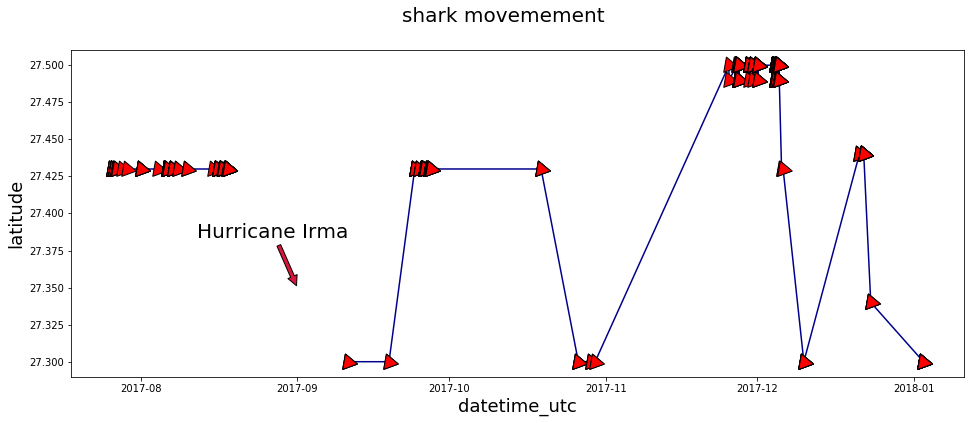

In [5]:
# Make a plot!

kw = {'marker': (3,0,20), 'markersize': 18, 'markerfacecolor':'red',
      'markeredgecolor':'black', 'linestyle': '-', 'color':'darkblue'}

fig, ax=plt.subplots(figsize=(16,6))

# slice the data into two parts for plotting gap in sightings during hurricane
shark1 = shark.iloc[:214]
shark2 = shark.iloc[215:]

ax.plot(shark1.lat_round, label=shark1.lon_round, **kw)
ax.plot(shark2.lat_round, label=shark2.lon_round, **kw)

fig.suptitle('shark movemement', fontsize=20)
plt.xlabel('datetime_utc', fontsize=18)
plt.ylabel('latitude', fontsize=18)

ax.annotate('Hurricane Irma', xy=(pd.Timestamp('2017-09'),27.350),
            xytext=(-100,50),
            textcoords='offset points',
            arrowprops=dict(
            arrowstyle='simple',
            facecolor='crimson',
            ), fontsize=20
           )